# Linear Regression

### USA housing data
##### The data contains the following columns:
 - 'Avg. Area Income': Avg. Income of residents of the city house is located in.
 - 'Avg. Area House Age': Avg Age of Houses in same city
 - 'Avg. Area Number of Rooms': Avg Number of Rooms for Houses in same city
 - 'Avg. Area Number of Bedrooms': Avg Number of Bedrooms for Houses in same city
 - 'Area Population': Population of city house is located in
 - 'Price': Price that the house sold at
 - 'Address': Address for the house

### Import data from CSV file

In [1]:
import pandas as pd
USAhousing = pd.read_csv('USA_Housing.csv')

In [2]:
USAhousing.head()
USAhousing.info()
USAhousing.describe()
USAhousing.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

### Visualize data

/var/folders/6m/g_y93z555psgg2jtr8y7rn5h0000gr/T/ipykernel_43403/1933310458.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(USAhousing['Price'],kde=False)
/var/folders/6m/g_y93z555psgg2jtr8y7rn5h0000gr/T/ipykernel_43403/1933310458.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(USAhousing.corr())


<AxesSubplot: >

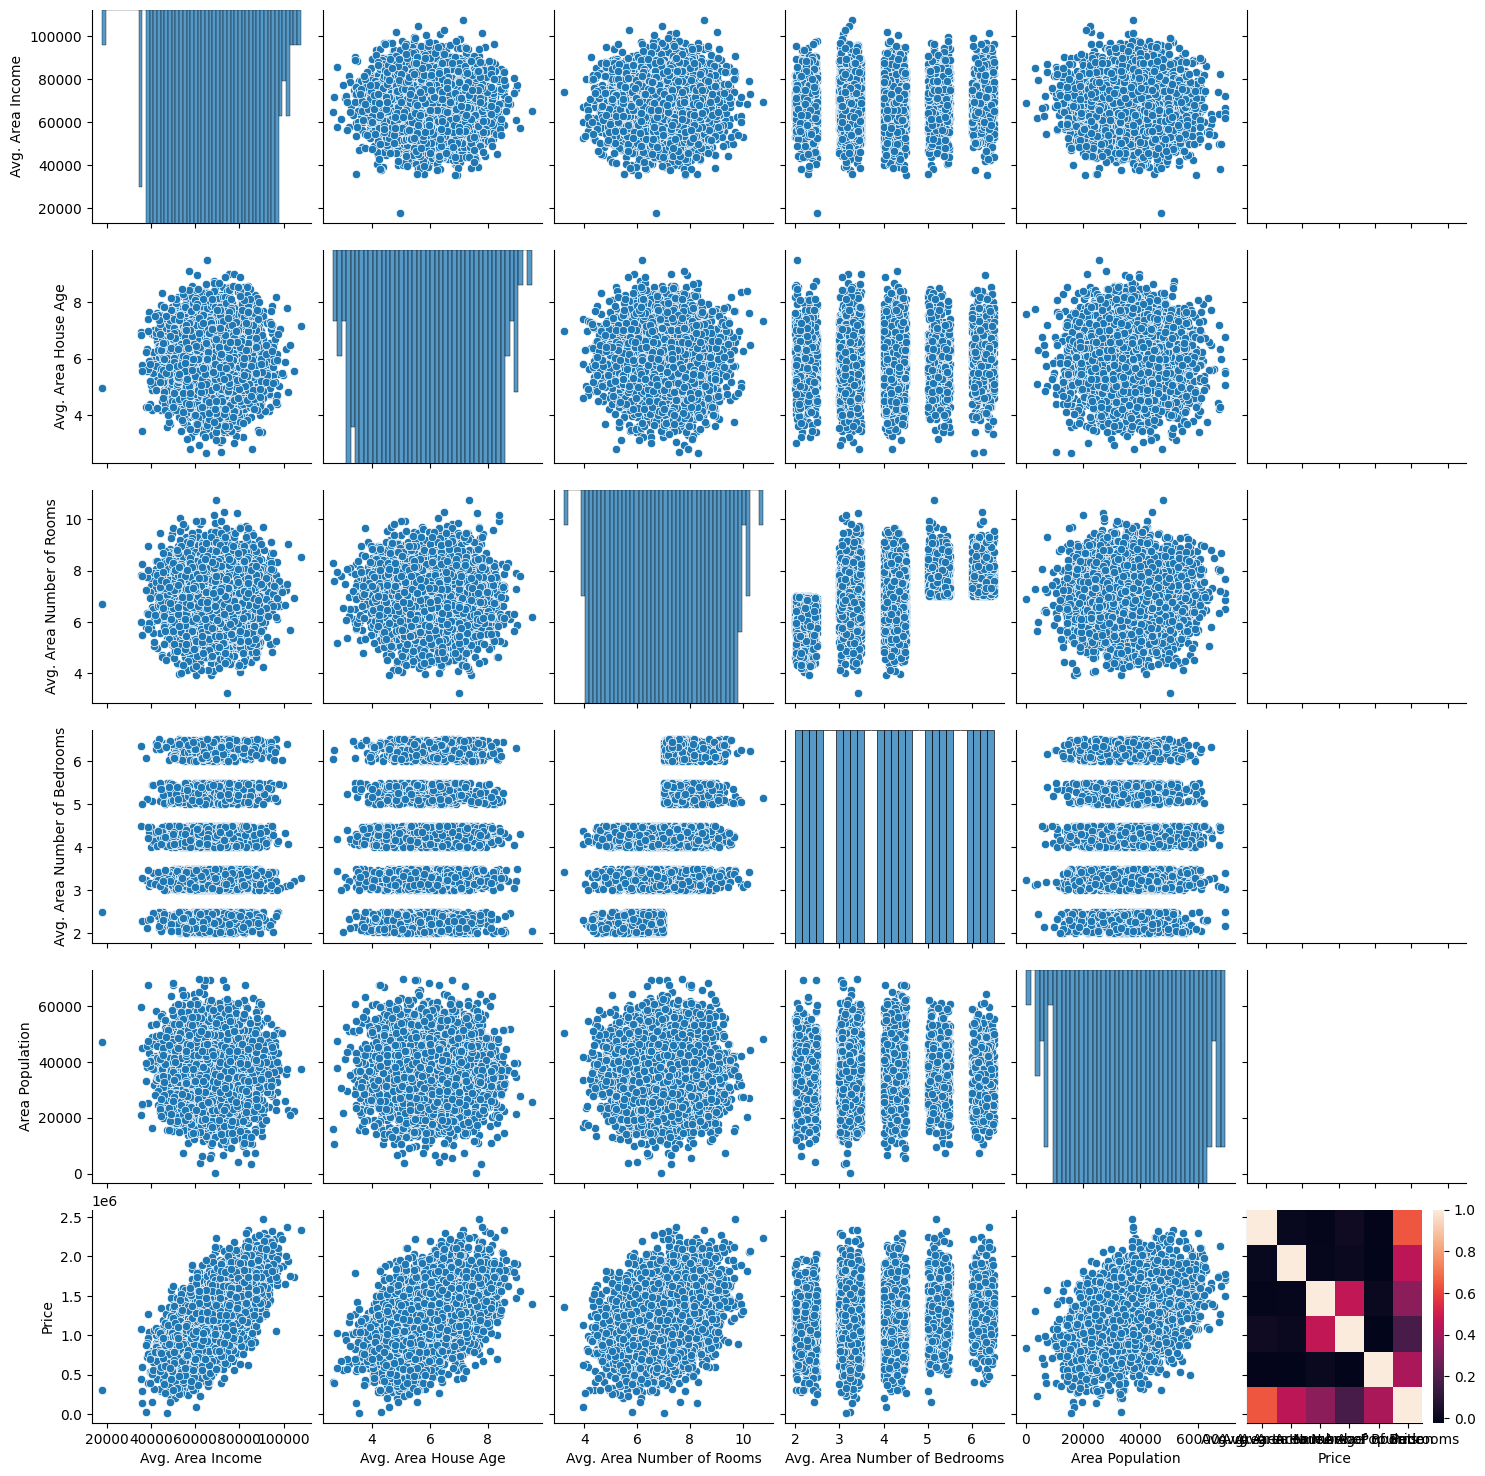

In [3]:
import seaborn as sns
sns.pairplot(USAhousing)
sns.distplot(USAhousing['Price'],kde=False)
sns.heatmap(USAhousing.corr())

### Training a Linear Regression Model

##### define training data set and test data set

In [5]:
from sklearn.model_selection import train_test_split
X = USAhousing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population']]
y = USAhousing['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

##### create model

In [6]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

### View the result

In [7]:
print(lm.intercept_)

-2640159.796851912


In [8]:
print(lm.coef_)

[2.15282755e+01 1.64883282e+05 1.22368678e+05 2.23380186e+03
 1.51504200e+01]


In [9]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])

In [10]:
coeff_df

,Coefficient
Avg. Area Income,21.528276
Avg. Area House Age,164883.282027
Avg. Area Number of Rooms,122368.678027
Avg. Area Number of Bedrooms,2233.801864
Area Population,15.150420


##### Coe = ความชันของ Graph
##### x เพิ่มขึ้น 1 หน่วย y เพิ่มขึ้น Coe หน่วย
##### Avg. Area Income เพิ่มขึ้น 1 หน่วย ราคาเพิ่ม = 21.528276
##### Avg. Area House Age	เพิ่มขึ้น 1 หน่วย ราคาเพิ่ม = 164883.282027

##### predict

In [11]:
predictions = lm.predict(X_test)

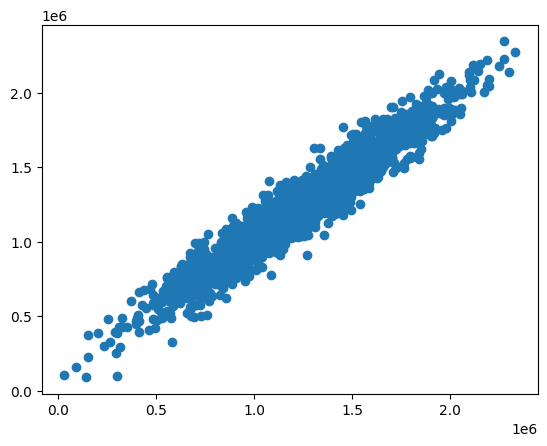

In [12]:
import matplotlib.pyplot as plt
plt.scatter(y_test,predictions)

/var/folders/6m/g_y93z555psgg2jtr8y7rn5h0000gr/T/ipykernel_43403/3766453348.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-predictions),kde=False,bins=10)


<AxesSubplot: xlabel='Price'>

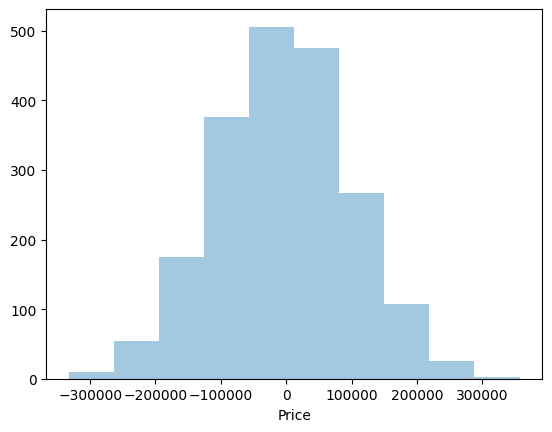

In [13]:
sns.distplot((y_test-predictions),kde=False,bins=10)

##### calculate error

In [14]:
import numpy as np
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 82288.22251914954
MSE: 10460958907.2095
RMSE: 102278.82922291152
